# Model

The following figure presents a schematic representation of the system, which includes two coordinate frames: the **world frame** (in red) and the **body frame** (in blue).

The angle $\delta$ is a constant parameter, fixed at 30°, and represents the orientation angle of the body.

The angle $\phi$ represents the orientation of the robot with respect to the world frame. Specifically, it denotes the angle between the world frame’s $x$-axis and the body frame’s $x_b$-axis, measured counterclockwise.

Each wheel is associated with a force $f$ (in newtons) and a motor shaft angular velocity $\omega$ (in radians per second).

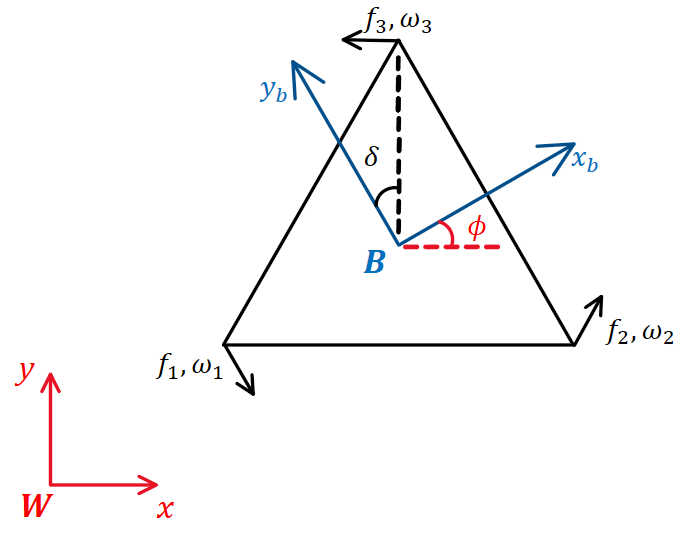

***Kinematics***

To convert from one frame to another, we use the rotation matrix like this:
$$
\begin{bmatrix}
v_{bx} \\
v_{by} \\
\omega_{b}
\end{bmatrix}
=
\begin{bmatrix}
 cos(\phi) & sin(\phi) & 0 \\
-sin(\phi) & cos(\phi) & 0 \\
   0       & 0         & 1
\end{bmatrix}
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
$$

\begin{equation} \tag{1}
\longrightarrow
\dot{q}_b = R_{\phi} \dot{q}_r
\end{equation}

From the above diagram, we can get the Motor shaft speed of each wheel in terms of the world frame ($x,y,\phi$) Geometricaly:
$$
\frac{r}{n} \omega_1 = - v_{by} + d\omega_b \\
\frac{r}{n} \omega_2 =  cos(\delta) v_{bx} + sin(\delta) v_{by} + d\omega_b \\
\frac{r}{n} \omega_3 = -cos(\delta) v_{bx} + sin(\delta) v_{by} + d\omega_b
$$

In a matrix form:

$$
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
0             &     -1        &  d \\
 cos(\delta)  &  sin(\delta)  &  d  \\
-cos(\delta)  &  sin(\delta)  &  d
\end{bmatrix}
\begin{bmatrix}
v_{bx} \\
v_{by} \\
\omega_{b}
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
0             &     -1        &  d \\
 cos(\delta)  &  sin(\delta)  &  d  \\
-cos(\delta)  &  sin(\delta)  &  d
\end{bmatrix}
\begin{bmatrix}
 cos(\phi) & sin(\phi) & 0 \\
-sin(\phi) & cos(\phi) & 0 \\
   0       & 0         & 1
\end{bmatrix}
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
$$

$$ \tag{2}
\longrightarrow
\dot{q}_w = \frac{n}{r}HR_{\phi}\dot{q}_r
$$

where:
- $r$: wheel radious
- $n$: gear reduction

**Note:** Actually, the real definition of $\phi$ is: $\phi = \phi + \delta$. This just for the matrices that depend of $\phi$

See the image to undertand why.


***Dynamics***

### Considering three wheels equal

From the above diagram and using the second Newton law, we can obtain geometricaly:
$$
M\dot{v}_{bx} = f_2 cos(\delta) - f_3 cos(\delta) \\
M\dot{v}_{by} = -f_1 + f_2 sin(\delta) + f_3 sin(\delta)\\
I\dot{\omega}_{b} = (f_1 + f_2 + f_3)d
$$

In a matrix form:

$$
\begin{bmatrix}
\dot{v}_{bx} \\
\dot{v}_{by} \\
\dot{\omega}_{b}
\end{bmatrix}
=
\begin{bmatrix}
1/M &  0  & 0 \\
0   & 1/M & 0 \\
0   &  0  & 1/I_n
\end{bmatrix}
\begin{bmatrix}
 0  & cos(\delta) & -cos(\delta) \\
-1  & sin(\delta) &  sin(\delta) \\
 d  &   d         &       d
\end{bmatrix}
\begin{bmatrix}
f_1  \\
f_2  \\
f_3
\end{bmatrix}
$$

$$ \tag{3}
\longrightarrow
\ddot{q}_b = DH^{T}f
$$

To obtain the force $f$, we use the motor dinamics:
$$
L_a \frac{di_a}{dt} + R_a i_a + K_e \omega = E
$$

Neglecting the motor circuits dynamics because, compared to motor mechanical dynamics, the are very fast $\frac{di_a}{dt} = 0$, then we have:
$$
i_a = \frac{1}{R_a} (E - K_e \omega)
$$
where:
- $i_a$: armature current
- $R_a$: armature resistance
- $K_e$: back emf constant of the motor


In terms of torque:
$$
T = K_t i_a = \frac{K_t}{R_a} (E - K_e \omega)
$$
where:
- $K_t$: motor torque constant


From the relation between toque and force, and asuming $K_e = K_t$:
$$
f = \frac{Tn}{r} = \frac{n K}{r R_a} (E - K \omega)
$$

In a more generalized form:
$$
f =
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
 = \frac{n K}{r R_a}
\begin{bmatrix}
E1 \\
E2 \\
E3
\end{bmatrix}
-
\frac{n K^2}{r R_a}
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
=
\frac{n K}{r R_a}  E
-
\frac{n K^2}{r R_a}
\dot{q}_w
$$

Using $(2)$:
$$
f = \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r
$$

Replacing the above in $(3)$:

$$ \tag{4}
\ddot{q}_b = DH^{T} ( \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r )
$$

Since the trajectory tracking problem is formulated with respect to the generalized coordinates $q_r$, we seek a model expressed in terms of inputs and quantities defined in the world frame.

The question then arises: how can we express $\ddot{q}_b$ in terms of $\dot{q}_r$ and $\ddot{q}_r$?

The answer is: derivate $(1)$
$$ \tag{5}
\frac{d}{dt} (\dot{q}_b) = \frac{d}{dt}( R_{\phi} \dot{q}_r )= \ddot{q}_b = R_{\phi} \ddot{q}_r + R^{'}_{\phi} \dot{q}_r
$$
where:
- $ R^{'}_{\phi} =
\begin{bmatrix}
-sin(\phi) &  cos(\phi) & 0 \\
-cos(\phi) & -sin(\phi) & 0 \\
   0       &  0         & 0
\end{bmatrix} $


Raplacing $(5)$ in $(4)$:
$$
R_{\phi} \ddot{q}_r + R^{'}_{\phi} \dot{q}_r
=
DH^{T} ( \frac{n K}{r R_a} E - \frac{n^2 K^2}{r^2 R_a} HR_{\phi}\dot{q}_r )
$$

$$ \tag{6}
\ddot{q}_r = - R^{-1}_{\phi} (R^{'}_{\phi} + \frac{n^2 K^2}{r^2 R_a} DH^{T} HR_{\phi}) \dot{q}_r + \frac{n K}{r R_a} R^{-1}_{\phi} DH^{T} E
$$

You could think it has the form of Space State system, but no really, it is non linear, so it can not be a SS

Morever, we want to write it in another form.

A standard form of a model is the next one:
$$
\dot{X} = f(X,u) , u:=E
$$

For our case, and using $(6)$, the model in such form is:
$$
\dot{X}
=
\begin{bmatrix}
\dot{q}_r \\
\ddot{q}_r
\end{bmatrix}
=
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi} \\
\ddot{x} \\
\ddot{y} \\
\ddot{\phi}
\end{bmatrix}
=
\begin{bmatrix}
1 \\
- R^{-1}_{\phi} (R^{'}_{\phi} + \frac{n^2 K^2}{r^2 R_a} DH^{T} HR_{\phi})  
\end{bmatrix} \dot{q}_r
+
\begin{bmatrix}
 0 \\
 \frac{n K}{r R_a} R^{-1}_{\phi} DH^{T}  
\end{bmatrix} E
$$

---

### Considering three wheels different

*Since the $K$ and $R_a$ are not the same for all three wheels. We have:*

From the relation between torque and force, and allowing **different parameters for each motor** (with $K_{e,i} = K_{t,i}$ for each $i=1,2,3$):  

$$
f =
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
=
\frac{n}{r}
\begin{bmatrix}
\tfrac{K_1}{R_{a,1}} & 0 & 0 \\
0 & \tfrac{K_2}{R_{a,2}} & 0 \\
0 & 0 & \tfrac{K_3}{R_{a,3}}
\end{bmatrix}
\begin{bmatrix}
E_1 \\
E_2 \\
E_3
\end{bmatrix}
-
\frac{n}{r}
\begin{bmatrix}
\tfrac{K_1^2}{R_{a,1}} & 0 & 0 \\
0 & \tfrac{K_2^2}{R_{a,2}} & 0 \\
0 & 0 & \tfrac{K_3^2}{R_{a,3}}
\end{bmatrix}
\begin{bmatrix}
\omega_1 \\
\omega_2 \\
\omega_3
\end{bmatrix}
$$

This can be written compactly as:
$$
f = \frac{n}{r} \Lambda_E \, E - \frac{n}{r} \Lambda_{\omega} \, \dot q_w
$$

with the diagonal gain matrices defined by
$$
\Lambda_E = \mathrm{diag}\!\left(\frac{K_1}{R_{a,1}}, \; \frac{K_2}{R_{a,2}}, \; \frac{K_3}{R_{a,3}}\right),
$$
$$
\Lambda_{\omega} = \mathrm{diag}\!\left(\frac{K_1^2}{R_{a,1}}, \; \frac{K_2^2}{R_{a,2}}, \; \frac{K_3^2}{R_{a,3}}\right).
$$

Thus, the force vector $f$ naturally captures the effect of **non-identical motors** through per-motor parameters instead of assuming all are the same.

Using $(2)$:
$$
f = \frac{n}{r} \Lambda_E E - \frac{n^2}{r^2} \Lambda_{\omega} HR_{\phi}\dot{q}_r
$$

Replacing the new $f$ in $(3)$:

$$ \tag{4}
\ddot{q}_b = DH^{T}(
    \frac{n}{r}
    \begin{bmatrix}
    \tfrac{K_1}{R_{a,1}} & 0 & 0 \\
    0 & \tfrac{K_2}{R_{a,2}} & 0 \\
    0 & 0 & \tfrac{K_3}{R_{a,3}}
    \end{bmatrix} E
    -
    \frac{n^2}{r^2}
    \begin{bmatrix}
    \tfrac{K_1^2}{R_{a,1}} & 0 & 0 \\
    0 & \tfrac{K_2^2}{R_{a,2}} & 0 \\
    0 & 0 & \tfrac{K_3^2}{R_{a,3}}
    \end{bmatrix}
    HR_{\phi}\dot{q}_r
)
$$

Partiendo de la ecuación original (y suponiendo $R_{\phi}$ invertible), 
la expresión despejada para $\ddot{q}_r$ queda:
$$

R_{\phi}\,\ddot{q}_r + R'_{\phi}\,\dot{q}_r
=
DH^{T}\!\left(
\frac{n}{r}\,\Lambda_{E}\,E
-
\frac{n^{2}}{r^{2}}\,\Lambda_{\omega}\,H\,R_{\phi}\,\dot{q}_r
\right).

$$
Despejando y multiplicando por $R_{\phi}^{-1}$:
$$

\ddot{q}_r
=
R_{\phi}^{-1}DH^{T}\!\left(\frac{n}{r}\,\Lambda_{E}\,E\right)
-
R_{\phi}^{-1}\Big(DH^{T}\!\left(\frac{n^{2}}{r^{2}}\,\Lambda_{\omega}\right)H R_{\phi} + R'_{\phi}\Big)\,\dot{q}_r.

$$

---

#  Simulation: Non linear System

In [2]:
from math import sqrt, sin, cos, pi
import numpy as np
import control as ct
from control.matlab import *
import matplotlib.pyplot as plt
from scipy.signal import square

In [3]:
def updfnc_omniwheel(t, X, U, params):
    # Parameter setup
    d = params.get('d', 0.099)   # Distance of the wheels wrt robot center
    r = params.get('r', 0.0325)  # Wheel radius
    n = params.get('n', 1)       # Gear reduction ratio
    
    # Motor constants
    K_1 = params.get('K_1', 0.259)
    K_2 = params.get('K_2', 0.261)
    K_3 = params.get('K_3', 0.265)
    Ra_1 = params.get('Ra_1', 1.3111)
    Ra_2 = params.get('Ra_2', 1.3121)
    Ra_3 = params.get('Ra_3', 1.3109)

    # Robot parameters
    M = params.get('M', 1.944)   
    I = params.get('I', 0.015)   
    delt = params.get('delt', np.pi/6) 

    # Map states
    x, y, phi, dx, dy, dphi = X
    phi = phi + delt

    # Matrices
    H = np.array([[0, -1, d],
                  [np.cos(delt), np.sin(delt), d],
                  [-np.cos(delt), np.sin(delt), d]])

    D = np.array([[1/M, 0, 0],
                  [0, 1/M, 0],
                  [0, 0, 1/I]])

    Rphi = np.array([[np.cos(phi), np.sin(phi), 0],
                     [-np.sin(phi), np.cos(phi), 0],
                     [0, 0, 1]])

    Rphi_ = np.array([[-np.sin(phi), np.cos(phi), 0],
                      [-np.cos(phi), -np.sin(phi), 0],
                      [0, 0, 0]])

    # Lambda matrices (without n/r factors)
    Lambda_E = np.diag([K_1/Ra_1, K_2/Ra_2, K_3/Ra_3])
    Lambda_w = np.diag([K_1**2/Ra_1, K_2**2/Ra_2, K_3**2/Ra_3])

    # New equation implementation
    term_input = (n/r) * (D @ H.T @ Lambda_E @ U)
    term_damping = (n**2 / r**2) * (D @ H.T @ Lambda_w @ H @ Rphi @ X[3:])
    ddq = np.linalg.inv(Rphi) @ (term_input - term_damping - Rphi_ @ X[3:])

    # State derivative
    return np.array([dx, dy, dphi, ddq[0], ddq[1], ddq[2]])


def outfnc_omniwheel(t, X, U, params):
    return X

PID Implementation

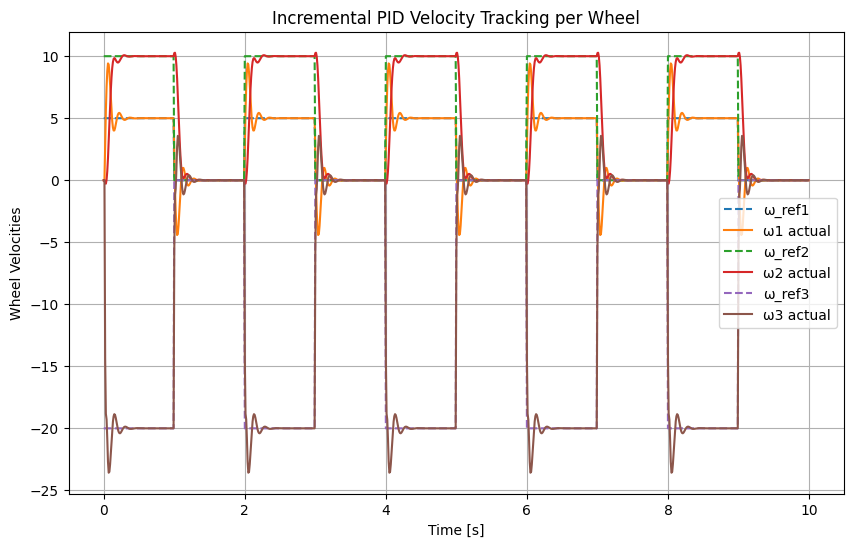

In [10]:
# Simulation parameters
Ts = 0.01
time = 10
T = np.arange(0, time, Ts)

# ==========================
# 1) Construct the discrete linear system
# ==========================
Ts = 0.01

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Define the initial state in the linearized space
# It must be a vector with as many dimensions as states in A_z
X0 = [0, 0, 0, 0, 0, 0]

# PID parameters for each wheel
Kp = np.array([0.71, 0.76, 0.75])
Ki = np.array([4.36, 0.88, 4.02])
Kd = np.array([0.02, -0.29, -0.1])

# Desired angular velocity for each wheel (could come from a trajectory generator)
omega_ref = np.zeros((len(T), 3))
omega_ref[:, 0] = 5 * (np.mod(T, 2) < 1).astype(float)  # Example square pulse
omega_ref[:, 1] = 10 * (np.mod(T, 2) < 1).astype(float)
omega_ref[:, 2] = -20 * (np.mod(T, 2) < 1).astype(float)

# Initialize
U_pid = np.zeros((len(T), 3))
e = np.zeros((len(T), 3))  # Error for each wheel

# Extract system matrices
A, B, C, D = A_z, B_z, C_z, D_z
x = np.zeros((6,))  # initial state
y_log = np.zeros((len(T), 6))
x_log = np.zeros((len(T), 6))

# Initialize data containers before the loop
X_samples = []
Y_samples = []

# Control loop simulation
for k in range(2, len(T)):
    # Measure: get current wheel velocities (dx, dy, dphi can be converted)
    vel_real = x[3:6]

    # Compute error
    e[k] = omega_ref[k] - vel_real

    # Incremental PID law
    dU = (Kp * (e[k] - e[k-1]) +
          Ki * e[k] +
          Kd * (e[k] - 2*e[k-1] + e[k-2]))

    # Update control signal
    U_pid[k] = U_pid[k-1] + dU

    # Apply input to discrete system: x[k+1] = A*x[k] + B*U[k]
    x = A @ x + B @ U_pid[k]
    y = C @ x + D @ U_pid[k]

    # Log data
    x_log[k] = x
    y_log[k] = y

    # ------------------------------------------
    # Collect training sample for this timestep
    # ------------------------------------------
    # Input features: [s[k], r[k], e[k], e[k-1], e[k-2]]
    # Here: s[k] = current measured velocity (can flatten or choose one axis)
    # r[k] = reference velocity
    s_k = vel_real.flatten()
    r_k = omega_ref[k].flatten()
    e_k = e[k].flatten()
    e_k1 = e[k-1].flatten()
    e_k2 = e[k-2].flatten()

    # Flatten all to 1D and concatenate (for multiwheel systems)
    X_k = np.concatenate([s_k, r_k, e_k, e_k1, e_k2])

    # Target output: [Kp, Ki, Kd] (same for all wheels)
    Y_k = np.array([Kp, Ki, Kd])

    X_samples.append(X_k)
    Y_samples.append(Y_k)

# Convert to numpy arrays after loop
X_samples = np.array(X_samples)
Y_samples = np.array(Y_samples)

np.savez(f'data/train/run_{Ts}{Kp}{Ki}{Kd}.npz', X=X_samples, y=Y_samples)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(T, omega_ref[:,0], '--', label='ω_ref1')
plt.plot(T, y_log[:,3], label='ω1 actual')
plt.plot(T, omega_ref[:,1], '--', label='ω_ref2')
plt.plot(T, y_log[:,4], label='ω2 actual')
plt.plot(T, omega_ref[:,2], '--', label='ω_ref3')
plt.plot(T, y_log[:,5], label='ω3 actual')
plt.xlabel('Time [s]')
plt.ylabel('Wheel Velocities')
plt.legend()
plt.title('Incremental PID Velocity Tracking per Wheel')
plt.grid()
plt.show()

**Discrete Simulation**

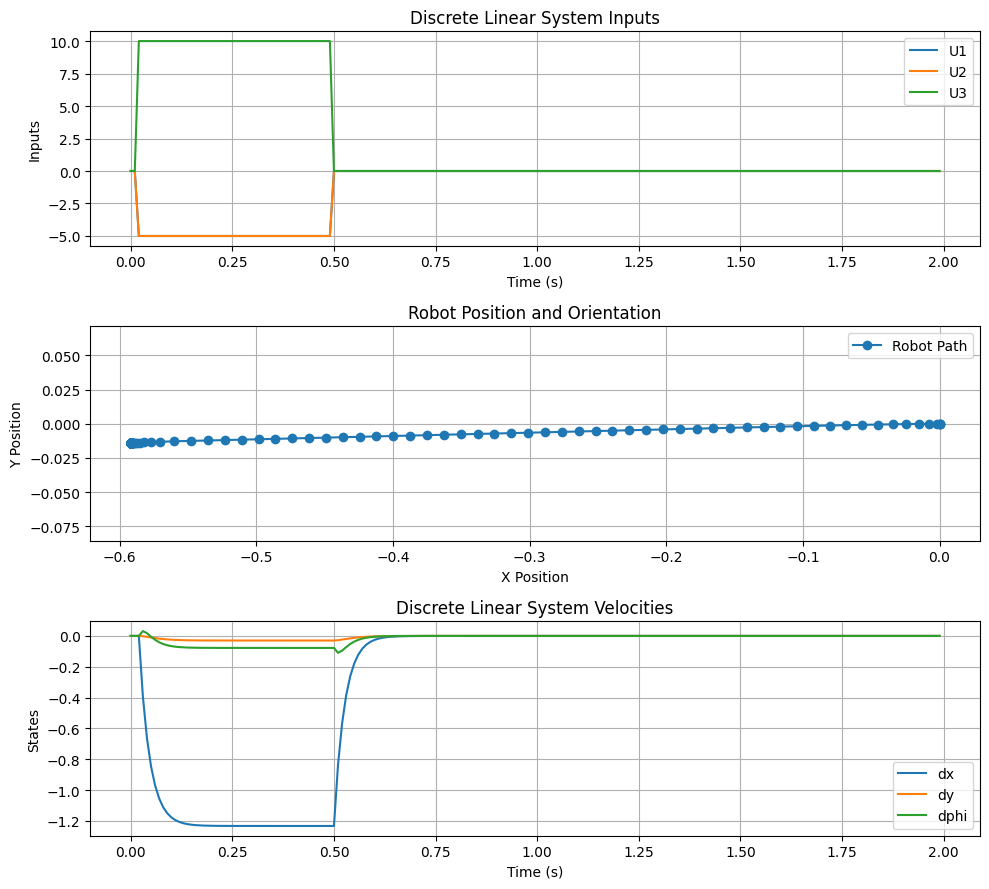

In [ ]:
# Simulation parameters
Ts = 0.01
time = 10
T = np.arange(0, time, Ts)



# ==========================
# 1) Construct the discrete linear system
# ==========================
Ts = 0.01

# Define the nonlinear system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Find the equilibrium point
X0 = [0, 0, 0, 0, 0, 0]
eqpt = ct.find_eqpt(io_sys, X0, 0)
xeq = eqpt[0]

# Linearize the system at the equilibrium point
lin_omni = ct.linearize(io_sys, xeq, 0)
sys_z = ct.c2d(lin_omni, Ts, method='zoh')  # Convert to discrete-time system
A_z, B_z, C_z, D_z = sys_z.A, sys_z.B, sys_z.C, sys_z.D

sys_lin_z = ct.StateSpace(A_z, B_z, C_z, D_z, Ts)

# Define the initial state in the linearized space
# It must be a vector with as many dimensions as states in A_z
X0 = [0, 0, 0, 0, 0, 0]

# ==========================
# 2) Create discrete control inputs (con retardo)
# ==========================
# Definir el tiempo muerto en segundos
dead_time = 0.02 # Ejemplo: 0.02 segundos

# Calcular el número de pasos de retardo (N)
# Ts = 0.01
N_delay = int(np.round(dead_time / Ts)) # N_delay = 2 pasos

# Crear el vector de control U (el deseado)
U_desired = np.zeros((len(T), 3))
pulse_width = 0.5 - dead_time
pulse_period = 2.0

U_desired[:, 0] = -5 * (np.mod(T, pulse_period) < pulse_width).astype(float)
U_desired[:, 1] = -5 * (np.mod(T, pulse_period) < pulse_width).astype(float)
U_desired[:, 2] = 10 * (np.mod(T, pulse_period) < pulse_width).astype(float)

# =========================================================
# Aplicación del Retardo Puro
# =========================================================
# 1. Crear un vector de ceros inicial (la duración del retardo)
zeros_delay = np.zeros((N_delay, 3))

# 2. Obtener la parte de U_desired que se aplicará (todo menos los N_delay últimos)
U_shifted = U_desired[:-N_delay, :]

# 3. Concatenar: [Ceros Iniciales ; U_desired Desplazado]
U_retardo = np.concatenate((zeros_delay, U_shifted), axis=0)

# El vector de entrada real que se usará en la simulación es U_retardo
U = U_retardo # Sobreescribir U con el vector retardado
# =========================================================

# ==========================
# 3) Simulate the discrete linear system
# ==========================
# input_output_response() simulates a StateSpace (or TransferFunction) model with input U
t_out, y_out = ct.input_output_response(sys_lin_z, T, U.T, X0)

# y_out has shape (#outputs, len(T)) => 6 rows if C_z is 6x6
# x_out has shape (#states, len(T)) => 6 rows

# ==========================
# 4) Plot results
# ==========================

fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# 4.1) Plot control inputs
axs[0].plot(T, U[:, 0], label="U1")
axs[0].plot(T, U[:, 1], label="U2")
axs[0].plot(T, U[:, 2], label="U3")
axs[0].legend()
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Inputs")
axs[0].set_title("Discrete Linear System Inputs")
axs[0].grid()

# 4.2) Plot position outputs (trajectory)
ax = axs[1]  # Reference to current subplot
ax.plot(y_out[0], y_out[1], marker="o", label="Robot Path")

# Ensure equal axis scaling for better spatial interpretation
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Robot Position and Orientation")
ax.legend()
ax.grid()

# 4.3) Plot velocity states
axs[2].plot(t_out, y_out[3], label="dx")
axs[2].plot(t_out, y_out[4], label="dy")
axs[2].plot(t_out, y_out[5], label="dphi")
axs[2].legend()
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("States")
axs[2].set_title("Discrete Linear System Velocities")
axs[2].grid()

plt.tight_layout()
plt.show()

**Continous simulation**

In [ ]:
# Define system
io_sys = ct.nlsys(
    updfnc_omniwheel, outfnc_omniwheel, inputs=('u1', 'u2', 'u3'),
    outputs=('x', 'y', 'phi', 'dx', 'dy', 'dphi'),
    name='omniwheel', states=('x', 'y', 'phi', 'dx', 'dy', 'dphi')
)

# Initial states
X0 = [0, 0, 0, 0, 0, 0]

# Simulation parameters
time = 10  # Total simulation time
dt = 0.001   # Time step
T = np.arange(0, time, dt)  # Time vector

# Define control inputs (3 inputs, initially set to 0)
U = np.zeros((len(T), 3))

# Configure input as a pulse train
pulse_width = 1.0   # Duration of each pulse
pulse_period = 2.0  # Repetition period

# First input: Zero (no action)
U[:, 0] = -5*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Second input: Pulse train
U[:, 1] = 5*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Third input: Inverted pulse train
U[:, 2] = 0*(np.mod(T, pulse_period) < pulse_width).astype(float)

# Simulate the system
t, x = ct.input_output_response(io_sys, T, U.T, X0)

# Extract relevant outputs
dx, dy, dphi = x[3, :], x[4, :], x[5, :]
x_pos = x[0, :] #np.cumsum(dx * dt)
y_pos = x[1, :] #np.cumsum(dy * dt)
phi_angle = x[2, :] #np.cumsum(dphi * dt)

# Create figure
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# Plot control inputs
axs[0].plot(T, U[:, 0], label="U1 (Control Input 1)")
axs[0].plot(T, U[:, 1], label="U2 (Control Input 2)")
axs[0].plot(T, U[:, 2], label="U3 (Control Input 3)")
axs[0].legend()
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Input Value")
axs[0].set_title("Control Inputs over Time")
axs[0].grid()

# Plot velocities
axs[1].plot(t, dx, label="dx (X velocity)")
axs[1].plot(t, dy, label="dy (Y velocity)")
axs[1].plot(t, dphi, label="dphi (Angular velocity)")
axs[1].legend()
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Velocity")
axs[1].set_title("Robot Velocities over Time")
axs[1].grid()

# Plot robot trajectory
ax = axs[2]  # Reference last subplot
ax.plot(x[0, :], x[1, :], marker="o", label="Robot Path")

# Ensure equal axis scaling
ax.set_aspect('equal', adjustable='datalim')

# # Add orientation arrows
# for i in range(0, len(x_pos), 10):
#     ax.arrow(x_pos[i], y_pos[i], 0.05 * np.cos(phi_angle[i]), 0.05 * np.sin(phi_angle[i]),
#              head_width=0.02, head_length=0.02, fc='red', ec='red')

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Robot Position and Orientation")
ax.legend()
ax.grid()

# Show all plots
plt.tight_layout()
plt.show()

